# Importing Packages

In [56]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier  # for KNN
#from sklearn.cluster import KernelKMeans  # for Kernel K-Means
from sklearn.linear_model import LinearRegression  # for Linear Regression
from sklearn.linear_model import Ridge  # for Ridge Regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report

# importing Data

In [23]:
heart= pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [24]:
heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# EDA

In [25]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [26]:
heart.isna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
for column in heart.columns:
    value_counts = heart[column].value_counts()
    print(f"Value counts for column '{column}':")
    print(value_counts)
    print("\n")

Value counts for column 'age':
age
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: count, dtype: int64


Value counts for column 'anaemia':
anaemia
0    170
1    129
Name: count, dtype: int64


Value counts for column 'creatinine_phosphokinase':
creatinine_phosphokinase
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: count, Length: 208, dtype: int64


<Axes: >

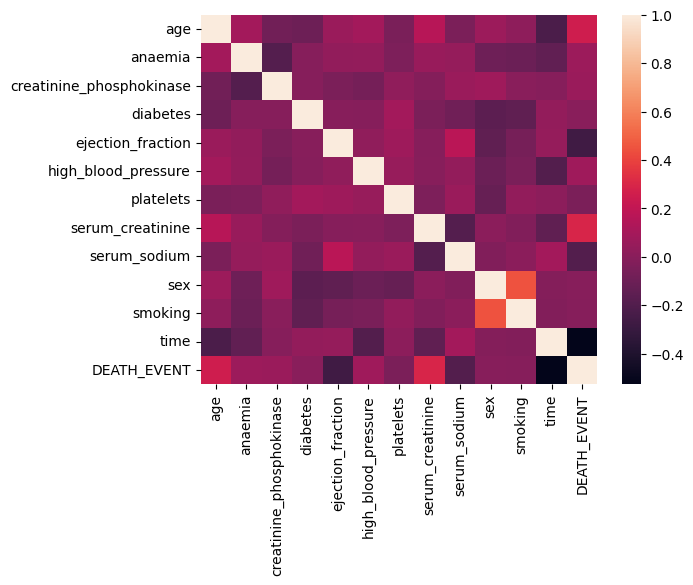

In [28]:
sns.heatmap(heart.corr())

# Task 1 Cluster analysis 

In [29]:
heartMinusDeath= heart.drop(columns='DEATH_EVENT')

In [30]:
heartMinusDeath

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


/Users/tutudaranijo/Downloads/School/Fall 2023/Deep Learning/Homework/AssigmentDeepLearning2/.conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tutudaranijo/Downloads/School/Fall 2023/Deep Learning/Homework/AssigmentDeepLearning2/.conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tutudaranijo/Downloads/School/Fall 2023/Deep Learning/Homework/AssigmentDeepLearning2/.conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explici

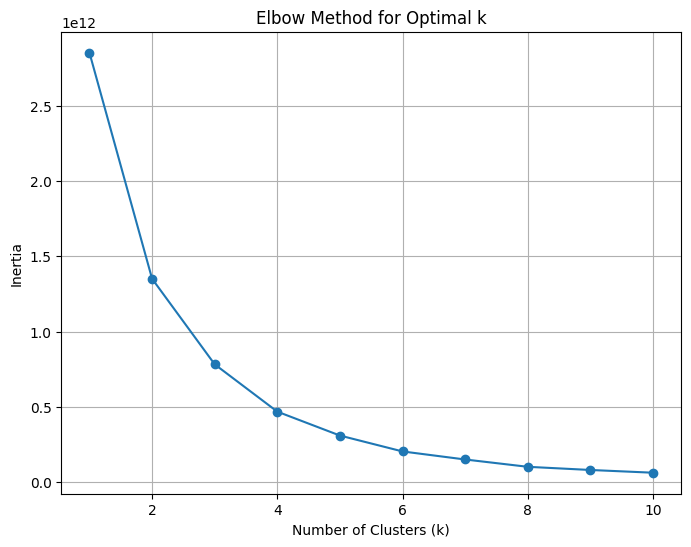

In [31]:
# optimal clusters
# elbow method
inertia = []


k_range = range(1, 11)


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(heartMinusDeath)
    inertia.append(kmeans.inertia_)

# Plot 
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [32]:
k = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model to your data
kmeans.fit(heartMinusDeath)

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Get cluster centroids
cluster_centers = kmeans.cluster_centers_

# Add the cluster labels to your DataFrame
heartMinusDeath['Cluster'] = cluster_labels

# Visualize the results, for example, with a scatter plot
plt.scatter(heartMinusDeath['Feature1'], heartMinusDeath['Feature2'], c=cluster_labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

/Users/tutudaranijo/Downloads/School/Fall 2023/Deep Learning/Homework/AssigmentDeepLearning2/.conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyError: 'Feature1'

# Task 2 Regression

In [33]:
X = heartMinusDeath.to_numpy()
Y = heart['DEATH_EVENT'].to_numpy()


In [34]:
# train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [35]:
# Linear Regression
linear_reg = LinearRegression()

# Fit the model on the training data
linear_reg.fit(X_train, Y_train)

# Predict on the test data
Y_pred_linear = linear_reg.predict(X_test)

In [36]:
ridge_reg = Ridge(alpha=1.0)

# Fit the model on the training data
ridge_reg.fit(X_train, Y_train)

# Predict on the test data
Y_pred_ridge = ridge_reg.predict(X_test)

In [37]:
mse_linear = mean_squared_error(Y_test, Y_pred_linear)
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)

print(f"Linear Regression MSE: {mse_linear}")
print(f"Ridge Regression MSE: {mse_ridge}")

Linear Regression MSE: 0.1578020495732169
Ridge Regression MSE: 0.15776574615506378


# Task 3 Classification 

In [44]:
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train, Y_train)

# Predict on the test data
Y_pred_nb = nb_model.predict(X_test)


In [45]:

# Calculate accuracy
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
print(f"Accuracy (Naive Bayes): {accuracy_nb:.2f}")


Accuracy (Naive Bayes): 0.77


In [46]:

# Get a classification report for additional metrics
classification_rep_nb = classification_report(Y_test, Y_pred_nb)
print("Classification Report (Naive Bayes):\n", classification_rep_nb)

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.73      0.97      0.84        37
           1       0.91      0.43      0.59        23

    accuracy                           0.77        60
   macro avg       0.82      0.70      0.71        60
weighted avg       0.80      0.77      0.74        60



In [51]:
knn_model = KNeighborsClassifier()

# Fit the model on the training data
knn_model.fit(X_train, Y_train)

# Predict on the test data
Y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn:.2f}")

Accuracy (KNN): 0.48


In [59]:
classification_rep_knn = classification_report(Y_test, Y_pred_knn)
print("Classification Report (K-Nearest Neighbors):\n", classification_rep_knn)


Classification Report (K-Nearest Neighbors):
               precision    recall  f1-score   support

           0       0.57      0.68      0.62        37
           1       0.25      0.17      0.21        23

    accuracy                           0.48        60
   macro avg       0.41      0.42      0.41        60
weighted avg       0.45      0.48      0.46        60



In [52]:
# Create a confusion matrix
cm_knn = confusion_matrix(Y_test, Y_pred_knn)


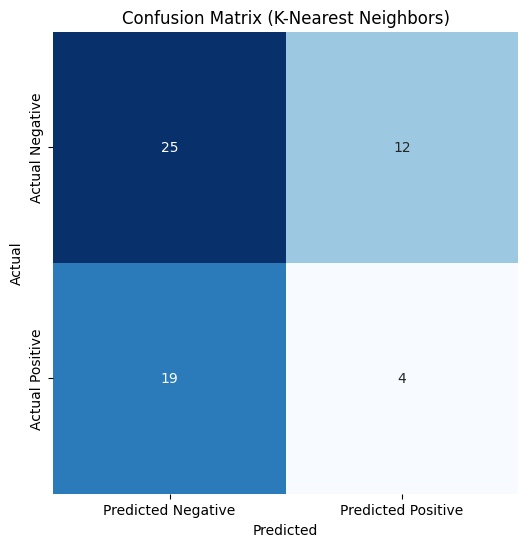

In [53]:

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (K-Nearest Neighbors)')
plt.show()


In [57]:

# Calculate ROC curve and AUC
Y_test_bin = label_binarize(Y_test, classes=[0, 1])
fpr, tpr, _ = roc_curve(Y_test_bin, knn_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)


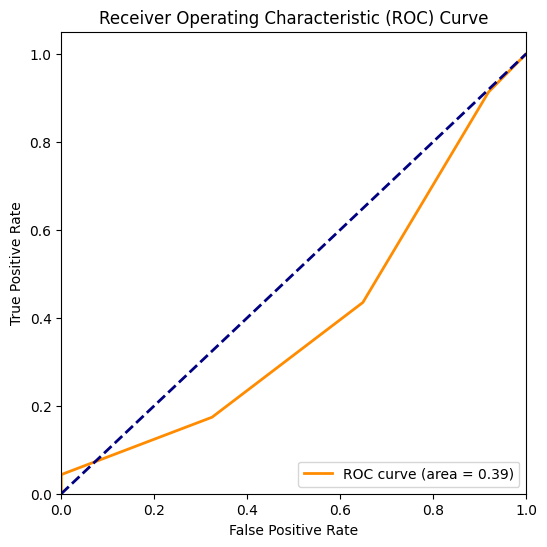

In [58]:

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()